In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-white')

In [2]:
np.random.seed(42)
X = np.hstack((np.ones(501).reshape(-1,1), np.random.normal(1, 1, size=[501, 1])))
#beta = np.random.uniform(size=[2, 1])
beta = np.array([0.8,1.1])
eps = np.random.normal(size=501)
y = X @ beta + eps

In [3]:
#Ridge
def ridge(radius = 1):
    # Creating equally spaced 101 data in range 0 to 2*pi
    theta = np.linspace(0, 2*np.pi, 101)

    # Generating x and y data
    beta1 = radius * np.cos(theta)
    beta2 = radius * np.sin(theta)
    
    return beta1, beta2

#Lasso
def lasso(radius = 1):

    # Generating x and y data
    beta1 = np.linspace(-radius, radius, 101)

    beta2 = np.abs(radius - np.abs(beta1))

    beta1 = np.concatenate((beta1, np.flip(beta1)))
    beta2 = np.concatenate((beta2,-np.flip(beta2)))
    
    return beta1, beta2

#Elastic net
def elastic_net(radius = 1):
    
    alpha = 0.3
    
    # Creating equally spaced 100 data in range 0 to pi
    theta = np.linspace(0, np.pi, 51)

    # Generating x and y data
    beta1R = np.sort(radius * np.cos(theta))
    beta2R = radius * np.sin(theta)
    
    beta1L = np.linspace(-radius, radius, 51)
    
    beta2L = np.abs(radius - np.abs(beta1L))
    
    beta1 = alpha*beta1R + (1-alpha)*beta1L
    
    beta2 = alpha*beta2R + (1-alpha)*beta2L
    
    beta1 = np.concatenate((beta1, np.flip(beta1)))
    beta2 = np.concatenate((beta2, -np.flip(beta2)))
    
    return beta1, beta2

def viz(ax, beta, contour, name, color_):
    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -2, 2, -2, 2
    ticks_frequency = 1

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('B0', size=14, labelpad=-30, x=1.01)
    ax.set_ylabel('B1', size=14, labelpad=-30, y=1.0, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    ax.fill(beta[0], beta[1], label=name, color=color_)

    ax.contour(contour[0], contour[1], contour[2], cmap='cool', levels = [np.min(contour[2])+0.1, 500, 550, 670, 900, 1100]) #<======= number of curves

    ax.legend()

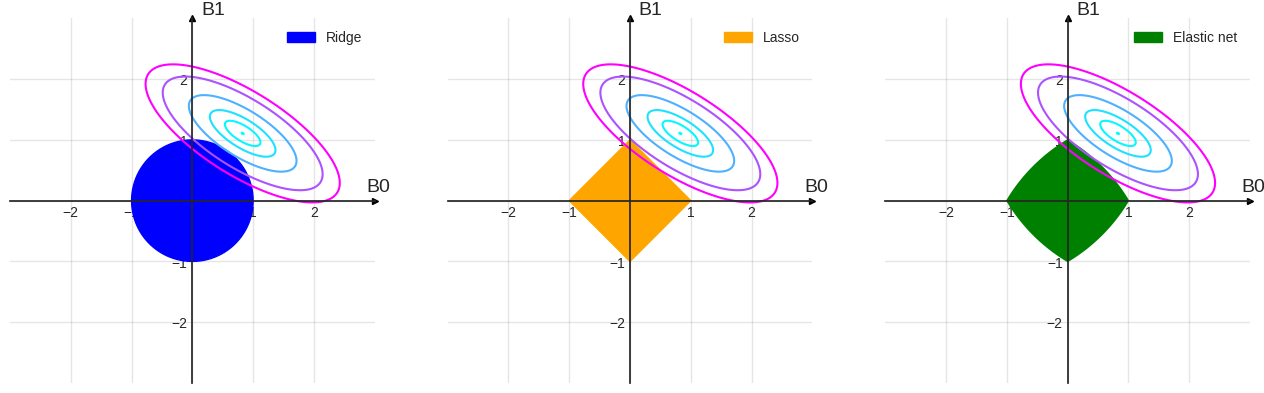

In [4]:
## Ridge
beta1R, beta2R = ridge()

## Lasso
beta1L, beta2L = lasso()

#Elastic net
beta1E, beta2E = elastic_net()

# Create grid coordinates for plotting
B0 = np.linspace(beta[0]-2, beta[0]+2, 201)
B1 = np.linspace(beta[1]-1.5, beta[1]+1.5, 201)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y.T - (xx[i,j]+X[:,1].ravel()*yy[i,j]))**2).sum()

# Plot points
fig, (ax, bx, cx) = plt.subplots(1, 3, figsize=(16, 12))

viz(ax, [beta1R, beta2R], [xx, yy, Z], 'Ridge', 'blue')

viz(bx, [beta1L, beta2L], [xx, yy, Z], 'Lasso', 'orange')

viz(cx, [beta1E, beta2E], [xx, yy, Z], 'Elastic net', 'green')

plt.show()